In [0]:
!pip install pymc3

# Bayesian Linear Regression

## Exploratory Data Analysis

Kindly note that **Print_Impressions.Ads40** column is changed to **Print_Impressions_Ads40** and **Print_Working_Cost.Ads50** to **Print_Working_Cost_Ads50**



In [0]:
import pymc3 as pm
import pandas as pd
df = pd.read_csv('Training.csv')

df.head()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions_Ads40,Print_Working_Cost_Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,11,62,55,0.49298,8.069,0.067591,7708,42.77,43.09,13.663,5.25,1.580,1.679,446172630,20.58,2.8135,0.19960,36.223,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,14,59,61,0.07811,9.328,0.046174,6693,42.84,44.26,9.632,1.87,0.806,1.654,856199835,26.53,2.3588,0.29390,43.028,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,33,51,33,0.94863,9.553,0.026979,2699,42.95,48.33,14.728,5.64,3.026,1.620,503553502,14.92,2.8399,0.31483,42.031,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,43,56,51,0.70916,7.838,0.106558,4898,43.53,59.10,0.465,2.86,1.006,1.620,463383476,28.92,2.7889,0.07673,41.377,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,22,48,54,0.96547,8.085,0.129135,8678,43.83,48.50,9.217,4.28,3.681,1.434,692252839,36.12,2.8071,0.36388,38.153,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


In [0]:
# This is for coverting data into period
# df.columns
# dfs =  pd.DataFrame(columns=df.columns)
# combine={}
# for col in df.columns:
#   combine[col]=0
# i=0
# for ind in df.index:
#   i=i+1
#   if(i<=28):
#     for col in df.columns:    
#       combine[col]=combine[col]+df[col][ind]
#       #print(df[col][ind],end=' ')
#   else:
#     #print(combine)
#     for col in df.columns:    
#       combine[col]=combine[col]/28
#     dfs=dfs.append(combine, ignore_index=True)
#     for col in df.columns:
#       combine[col]=0
#     i=0


# df=dfs
# df.head()

### Distribution of Features

It is userful to find Major Driver of Sales.

We have analysed the distribution of each of the feature.

Performing log transformation to reduce the scale and to distribute the data this will help in increasing the accuracy

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in df:
    df[i] = np.log(df[i]) 

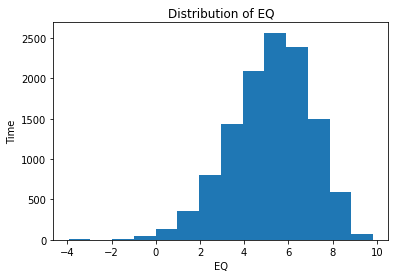

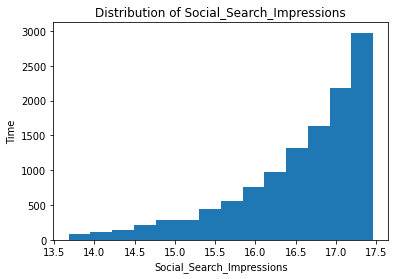

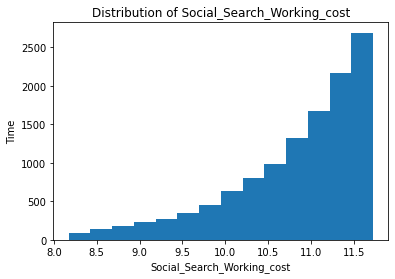

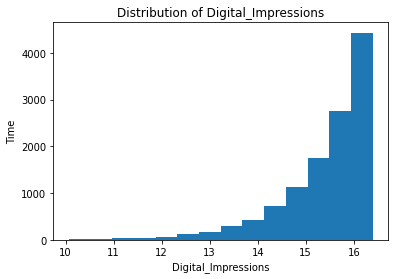

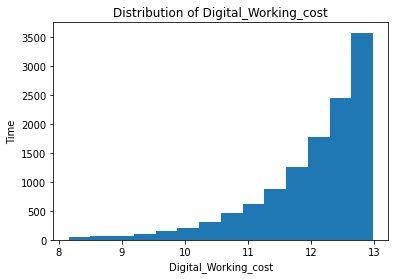

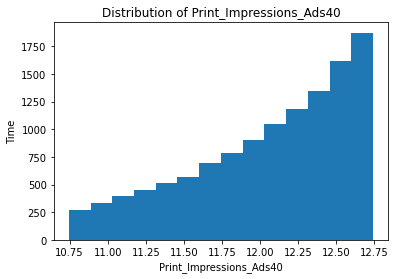

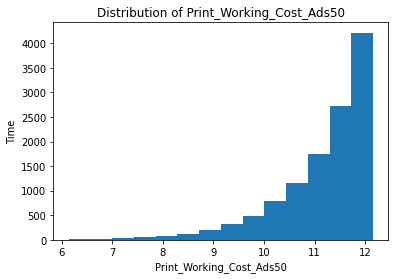

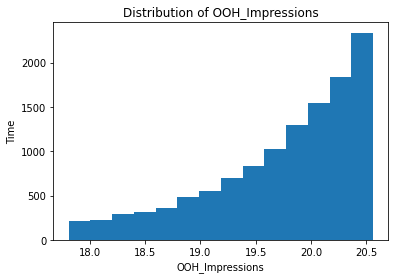

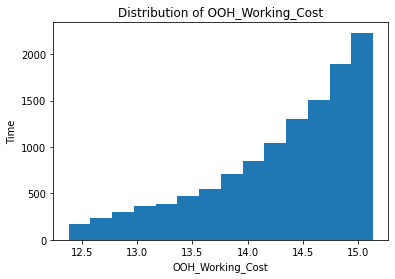

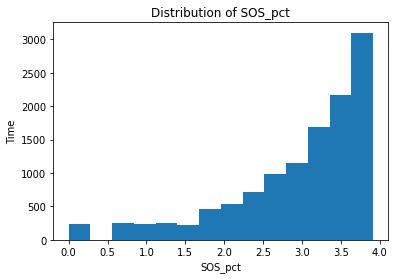

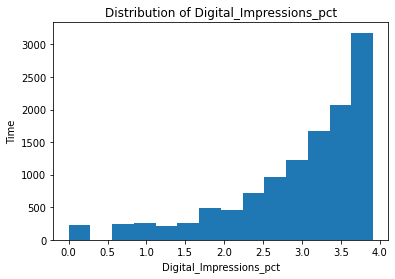

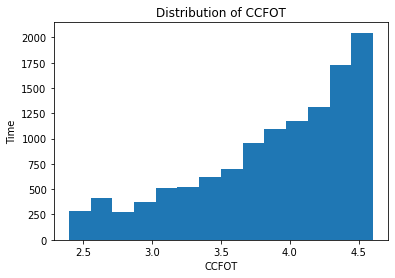

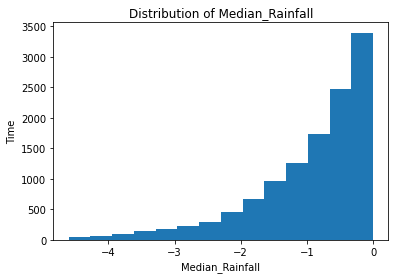

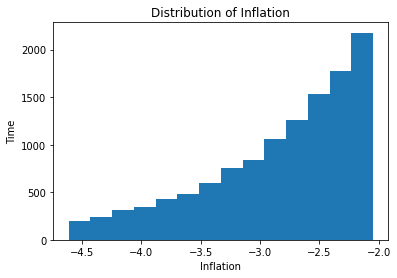

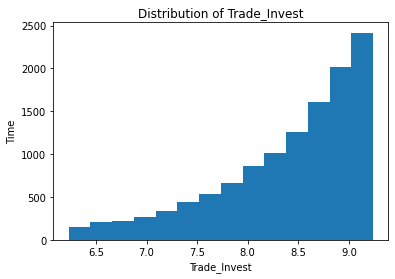

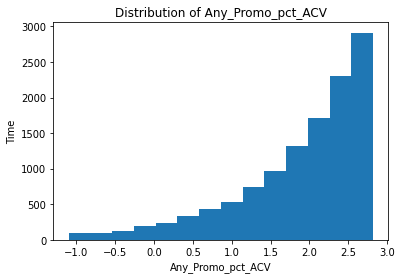

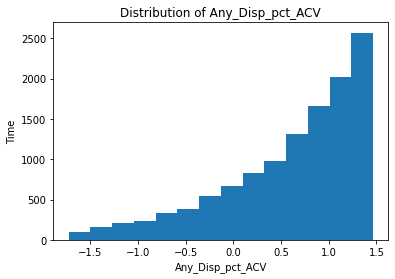

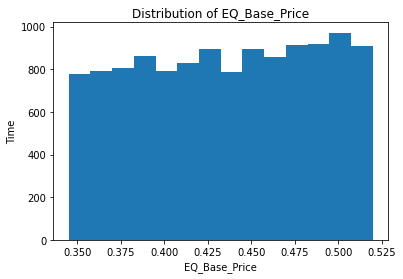

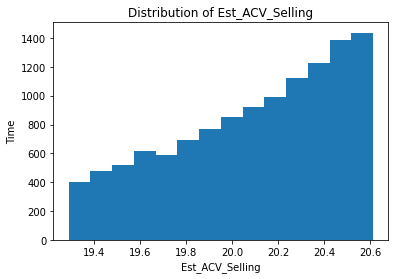

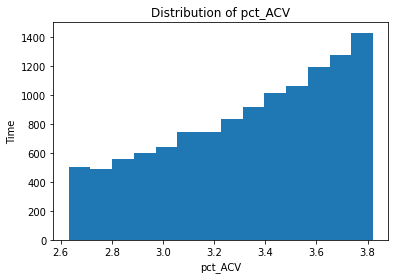

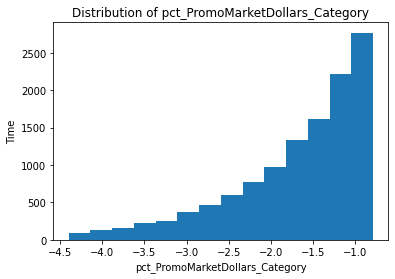

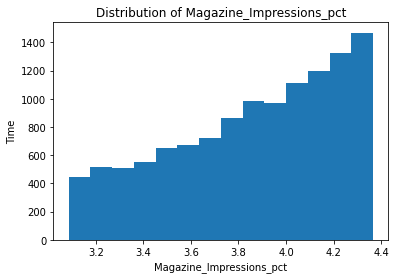

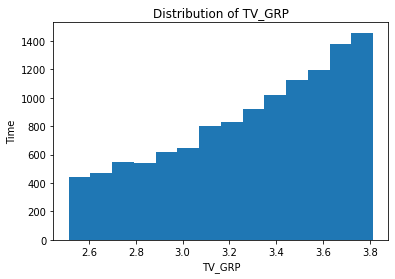

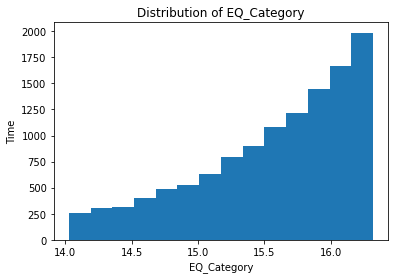

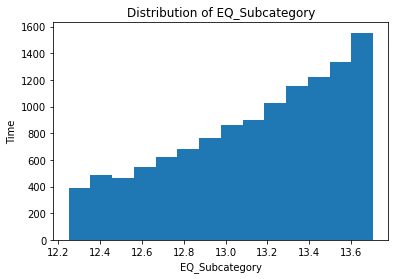

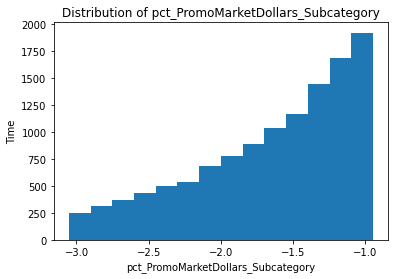

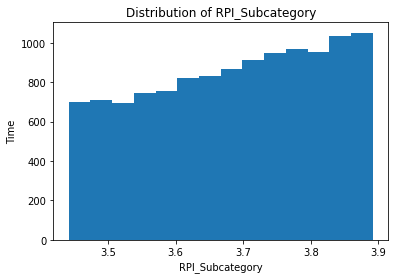

In [0]:
import matplotlib.pyplot as plt
import numpy as np


for i in df:
  plt.hist(df[i], bins = 14)
  plt.xlabel(i)
  plt.ylabel('Time')
  plt.title('Distribution of '+i)
  plt.show()

## Corelation

Finding the correlation between every feature with respect to EQ

In [0]:
df.corr()['EQ'].sort_values()

Magazine_Impressions_pct             -0.011693
Print_Impressions_Ads40              -0.011542
Competitor2_RPI                      -0.010706
CCFOT                                -0.007082
Fuel_Price                           -0.006528
OOH_Impressions                      -0.006448
SOS_pct                              -0.006181
OOH_Working_Cost                     -0.004661
RPI_Subcategory                      -0.003123
Any_Disp_pct_ACV                     -0.002601
Brand_Equity                         -0.002316
Digital_Working_cost                 -0.002309
Avg_no_of_Items                      -0.002027
Print_Working_Cost_Ads50              0.000556
Competitor3_RPI                       0.000900
Social_Search_Working_cost            0.001224
Digital_Impressions                   0.001462
RPI_Category                          0.001602
Est_ACV_Selling                       0.002594
Avg_EQ_Price                          0.002598
Day                                   0.002996
TV_GRP       

In [0]:
# Drop the features which have low correlation and are not distributed properly
df = df.drop(columns=['Competitor1_RPI',
                      'Competitor2_RPI',
                      'Competitor3_RPI',
                      'Competitor4_RPI',
                      'Fuel_Price',
                      'Avg_EQ_Price',
                      'Median_Temp',
                      'Brand_Equity',
                      'Any_Feat_pct_ACV',
                      'Avg_no_of_Items',
                      'RPI_Category',
                      'Day',])

In [0]:
from sklearn.model_selection import train_test_split
labels = df['EQ']
# df is features and labels are the targets 
# Split by putting 25% in the testing set
X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                   test_size = 0.005,
                                                    random_state=42)

In [0]:
# Formula for Bayesian Linear Regression (follows R formula syntax)
formula = 'EQ ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'EQ ~ Social_Search_Impressions + Social_Search_Working_cost + Digital_Impressions + Digital_Working_cost + Print_Impressions_Ads40 + Print_Working_Cost_Ads50 + OOH_Impressions + OOH_Working_Cost + SOS_pct + Digital_Impressions_pct + CCFOT + Median_Rainfall + Inflation + Trade_Invest + Any_Promo_pct_ACV + Any_Disp_pct_ACV + EQ_Base_Price + Est_ACV_Selling + pct_ACV + pct_PromoMarketDollars_Category + Magazine_Impressions_pct + TV_GRP + EQ_Category + EQ_Subcategory + pct_PromoMarketDollars_Subcategory + RPI_Subcategory'

In [0]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the data likelihood is a Normal Distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula( formula,data = X_train, family = family)
    
    # Draw the specified number of samples
    normal_trace = pm.sample(draws=500, chains = 1, tune = 100, cores=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sd, RPI_Subcategory, pct_PromoMarketDollars_Subcategory, EQ_Subcategory, EQ_Category, TV_GRP, Magazine_Impressions_pct, pct_PromoMarketDollars_Category, pct_ACV, Est_ACV_Selling, EQ_Base_Price, Any_Disp_pct_ACV, Any_Promo_pct_ACV, Trade_Invest, Inflation, Median_Rainfall, CCFOT, Digital_Impressions_pct, SOS_pct, OOH_Working_Cost, OOH_Impressions, Print_Working_Cost_Ads50, Print_Impressions_Ads40, Digital_Working_cost, Digital_Impressions, Social_Search_Working_cost, Social_Search_Impressions, Intercept]
100%|██████████| 600/600 [01:48<00:00,  5.55it/s]
There were 311 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3413100458062896, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence chec

In [0]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(normal_model, open(filename, 'wb'))

In [0]:
pm.summary(normal_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
Intercept,0.227826,0.026699,0.002658,0.207833,0.299980
Social_Search_Impressions,0.897665,0.012603,0.001157,0.855927,0.907149
Social_Search_Working_cost,-0.064650,0.010316,0.000813,-0.079163,-0.052415
Digital_Impressions,-0.069428,0.011760,0.000756,-0.079763,-0.055319
Digital_Working_cost,-0.046599,0.011265,0.001078,-0.077173,-0.040123
Print_Impressions_Ads40,-0.165450,0.027162,0.002363,-0.182052,-0.131838
Print_Working_Cost_Ads50,-0.052889,0.008708,0.000743,-0.071868,-0.042484
OOH_Impressions,-0.171647,0.019637,0.001906,-0.218535,-0.161166
OOH_Working_Cost,-0.120972,0.032832,0.002188,-0.155679,-0.113956
SOS_pct,-0.020211,0.005117,0.000439,-0.025908,-0.012274


In [0]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [0]:
model_formula = 'EQ = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])


'EQ =  -9.42 * Intercept + 0.94 * Social_Search_Impressions + -0.05 * Social_Search_Working_cost + -0.04 * Digital_Impressions + -0.03 * Digital_Working_cost + -0.11 * Print_Impressions_Ads40 + -0.03 * Print_Working_Cost_Ads50 + -0.11 * OOH_Impressions + -0.08 * OOH_Working_Cost + -0.01 * SOS_pct + -0.01 * Digital_Impressions_pct + -0.03 * CCFOT + 1.01 * Median_Rainfall + 1.01 * Inflation + -0.04 * Trade_Invest + -0.00 * Any_Promo_pct_ACV + -0.00 * Any_Disp_pct_ACV + -0.41 * EQ_Base_Price + -0.38 * Est_ACV_Selling + -0.07 * pct_ACV + 1.01 * pct_PromoMarketDollars_Category + -0.08 * Magazine_Impressions_pct + -0.06 * TV_GRP + 0.89 * EQ_Category + 0.79 * EQ_Subcategory + 1.01 * pct_PromoMarketDollars_Subcategory + -0.57 * RPI_Subcategory + -1.41 * sd_log__ + 0.25 * sd'

In [0]:
# Evalute the MCMC trace
import matplotlib.pyplot as plt
def evaluate_trace(trace, Xtest, ytest):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Create an intercept column
    Xtest['Intercept'] = 1

    # Align names of the test observations and means
    names = Xtest.columns[1:]
    Xtest = Xtest.ix[:, names]

    var_means = var_means[names]

    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = Xtest.index, columns = ['EQ'],dtype=np.float32)
    
    for row in Xtest.iterrows():
        results.ix[row[0], 'EQ'] = np.dot(np.array(var_means), np.array(row[1]))

    
    # Metrics 
    actual = np.array(ytest)

    errors = np.exp(results['EQ']) - np.exp(actual)
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    mape = np.mean(np.abs((np.exp(results['EQ']) - np.exp(actual)) /np.exp(actual))) * 100
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f} \nModel MAPE: {:.4f}'.format(mae, rmse, mape))
    print()
    
    lst = [i for i in range(len(actual))]
    plt.plot(lst,np.exp(results['EQ']), label = "predict")
    plt.plot(lst,np.exp(actual), label = "actual")
    plt.legend()
    plt.show()
    return results

Model  MAE: 96.5889
Model RMSE: 181.9583 
Model MAPE: 21.4030



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retv

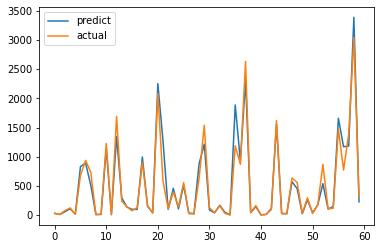

In [0]:
all_model_results = evaluate_trace(normal_trace, X_test, y_test)

In [0]:
# Naive baseline is the median 
# This provides the base values of MAE and RMSE
median_pred = X_train['EQ'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['EQ']
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(np.exp(median_preds), np.exp(true))
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 572.6678
Median Baseline RMSE: 1285.6938


In [0]:
#Put Your Test Data Here
import pymc3 as pm
import pandas as pd
test = pd.read_csv('Test.csv')

test.head()

In [0]:
# Drop the features which have low correlation and are not distributed properly
test = test.drop(columns=['Competitor1_RPI',
                      'Competitor2_RPI',
                      'Competitor3_RPI',
                      'Competitor4_RPI',
                      'Fuel_Price',
                      'Avg_EQ_Price',
                      'Median_Temp',
                      'Brand_Equity',
                      'Any_Feat_pct_ACV',
                      'Avg_no_of_Items',
                      'RPI_Category',
                      'Period',])

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in test:
    test[i] = np.log(test[i]) 

In [0]:
ytest= np.array(test['EQ'])
ytest = pd.Series(ytest)
all_model_results = evaluate_trace(normal_trace, test, ytest)